### Build a DNN using Keras with `RELU` and `ADAM`

#### Load tensorflow

In [1]:
import tensorflow as tf
import keras
tf.reset_default_graph()
tf.set_random_seed(42)

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


#### Collect Fashion mnist data from tf.keras.datasets 

In [2]:
(trainX, trainY),(testX, testY) = keras.datasets.mnist.load_data()

#### Change train and test labels into one-hot vectors

In [3]:
trainY = keras.utils.to_categorical(trainY, num_classes=10)
testY = keras.utils.to_categorical(testY, num_classes=10)

In [4]:
trainX = trainX / 255.0
testX = testX / 255.0

#### Build the Graph

#### Initialize model, reshape & normalize data

In [5]:
model = keras.models.Sequential()
model.add(keras.layers.Reshape((784,),input_shape=(28,28,)))
model.add(keras.layers.BatchNormalization())

#### Add two fully connected layers with 200 and 100 neurons respectively with `relu` activations. Add a dropout layer with `p=0.25`

In [6]:
#Hidden layers
model.add(keras.layers.Dense(200, activation='relu', name='Layer_1'))
model.add(keras.layers.Dense(100, activation='relu', name='Layer_2'))

#Dropout layer
model.add(keras.layers.Dropout(0.25))

#Hidden layers
model.add(keras.layers.Dense(60, activation='relu', name='Layer_3'))
model.add(keras.layers.Dense(30, activation='relu', name='Layer_4'))

#Dropout layer
model.add(keras.layers.Dropout(0.25))

### Add the output layer with a fully connected layer with 10 neurons with `softmax` activation. Use `categorical_crossentropy` loss and `adam` optimizer and train the network. And, report the final validation.

In [7]:
model.add(keras.layers.Dense(10, activation='softmax', name='Output'))

In [8]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
#Train the model
model.fit(trainX,trainY,          
          validation_data=(testX,testY),
          epochs=30,
          batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 6s 101us/step - loss: 0.5046 - acc: 0.8560 - val_loss: 0.1848 - val_acc: 0.9510
Epoch 2/30
60000/60000 [==============================] - 6s 94us/step - loss: 0.2457 - acc: 0.9372 - val_loss: 0.1627 - val_acc: 0.9641
Epoch 3/30
60000/60000 [==============================] - 7s 111us/step - loss: 0.1874 - acc: 0.9530 - val_loss: 0.1349 - val_acc: 0.9699
Epoch 4/30
60000/60000 [==============================] - 7s 113us/step - loss: 0.1570 - acc: 0.9607 - val_loss: 0.1221 - val_acc: 0.9716
Epoch 5/30
60000/60000 [==============================] - 7s 119us/step - loss: 0.1325 - acc: 0.9665 - val_loss: 0.1247 - val_acc: 0.9741
Epoch 6/30
60000/60000 [==============================] - 7s 115us/step - loss: 0.1187 - acc: 0.9687 - val_loss: 0.1167 - val_acc: 0.9748
Epoch 7/30
60000/60000 [==============================] - 8s 127us/step - loss: 0.1077 - acc: 0.9724 - val_loss: 0.1074 - v

In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1 (Reshape)          (None, 784)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 784)               3136      
_________________________________________________________________
Layer_1 (Dense)              (None, 200)               157000    
_________________________________________________________________
Layer_2 (Dense)              (None, 100)               20100     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
Layer_3 (Dense)              (None, 60)                6060      
_________________________________________________________________
Layer_4 (Dense)              (None, 30)                1830      
__________

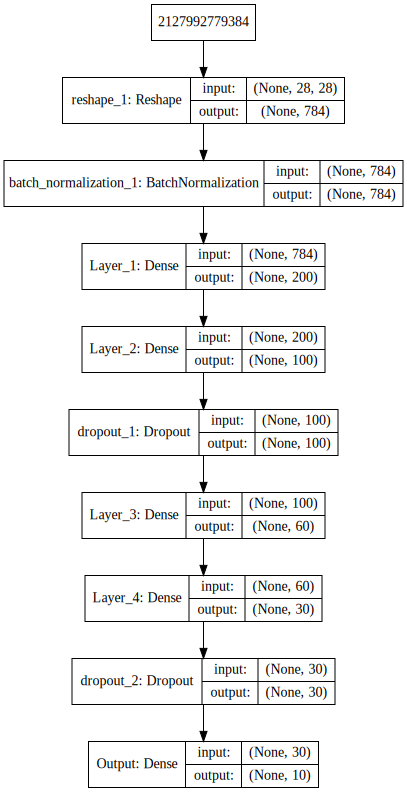

In [11]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model,show_shapes = True).create(prog='dot', format='svg'))